Epoch 20
Training Acc:0.9649122807017544
Validation Acc:0.9230769230769231
Epoch 40
Training Acc:0.9736842105263158
Validation Acc:0.9230769230769231
Epoch 20
Training Acc:0.9298245614035088
Validation Acc:0.7692307692307693
Epoch 40
Training Acc:0.9736842105263158
Validation Acc:0.9230769230769231
Epoch 60
Training Acc:0.9473684210526315
Validation Acc:0.7692307692307693
Epoch 80
Training Acc:0.9824561403508771
Validation Acc:0.9230769230769231
Epoch 100
Training Acc:0.956140350877193
Validation Acc:0.8461538461538461
Testing Acc: 1.0


/home/sandeep/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


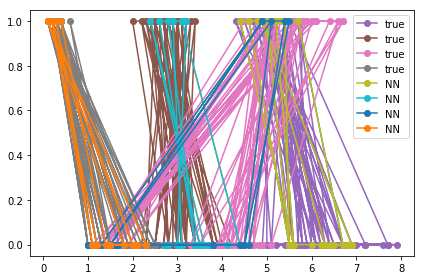

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = pd.read_csv("iris.csv")
iris = iris.sample(frac=1).reset_index(drop=True)

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = np.array(X)
X[:5]

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

Y = iris.species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)


def nnet(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = inwt(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Acc:{}".format(Acc(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Acc:{}".format(Acc(X_val, Y_val, weights)))

    return weights

def inwt(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []

    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))

    return weights

def FwardPtion(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sig(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)

    return activations

def BwardPtion(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)

    for j in range(layers, 0, -1):
        currActivation = activations[j]

        if(j > 1):

            prevActivation = np.append(1, activations[j-1])
        else:

            prevActivation = activations[0]

        delta = np.multiply(error, SigGradient(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)


    return weights


def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))

        activations = FwardPtion(x, weights, layers)
        weights = BwardPtion(y, activations, weights, layers)

    return weights



def Sig(x):
    return 1 / (1 + np.exp(-x))

def SigGradient(x):
    return np.multiply(x, 1-x)




def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)


    activations = FwardPtion(item, weights, layers)

    outputFinal = activations[-1].A1
    index = FMaxAction(outputFinal)


    y = [0 for i in range(len(outputFinal))]
    y[index] = 1

    return y


def FMaxAction(output):

    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i

    return index


def Acc(X, Y, weights):

    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):

            correct += 1


    return correct / len(X)


f = len(X[0])
o = len(Y[0])

layers = [f, 5, 10, o]
lr, epochs = 0.15, 50

weights = nnet(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr)


f = len(X[0])
o = len(Y[0])

layers = [f, 5, 10, o]
lr, epochs = 0.15, 100

weights = nnet(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr)


print("Testing Acc: {}".format(Acc(X_test, Y_test, weights)))


plt.plot(X_test, Y_test)

plt.plot(X_train, Y_train, '-o', label='true')
plt.plot(X_test, Y_test, '-o', label='NN')
plt.legend()

plt.tight_layout()
plt.show()